<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Luis María Ramirez de la Rosa

**Fecha:** 06 de octubre del 2020.

**Expediente** : IF691761
    
**Profesor:** Oscar David Jaramillo Zuluaga. 
   
**Link:** https://github.com/luismaria8992ramirez/SPF_LMRR_Tareas_7_8_9/blob/main/Tarea7_LMRamirez.ipynb 
    
# Tarea 7: Clase 14

# Tarea: Parte 1 

Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente imagen:
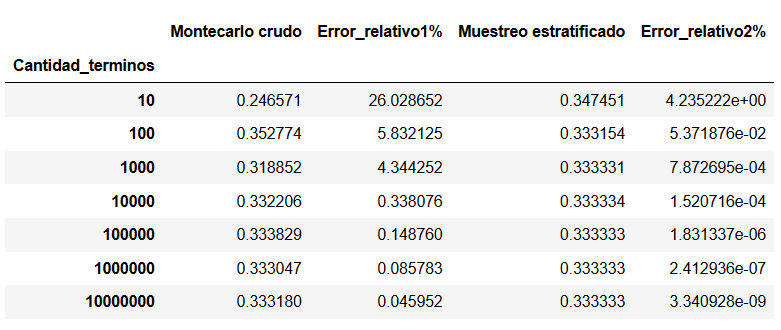

In [6]:
# Librerias Parte 1
import numpy as np
import pandas as pd
import scipy.stats as st
# Librerias Parte 2
import time
import random
from functools import reduce
import matplotlib.pyplot as plt

## Respuesta de: RSlay

In [2]:
# Respuesta 1
def int_montecarlo(f:'Función', a:'Límite inferior', b:'Límie superior', U:'Muestra de números U~[a,b]'):
    '''Integra una funcion "f" con limites de "a" a "b" dado una cantidad de numeros aleatorios uniformes U.'''
    return (b-a)/len(U)*np.sum(f(U))


def estratos(n_estratos:'Cantidad de Estratos'):
    '''Realiza el método de muestreo estratificado'''
    U2 = np.random.rand(n_estratos)
    i = np.arange(0, n_estratos)
    v = (U2+i)/n_estratos
    return v # m_estratificado


In [3]:
I = 1/3
# intervalo de integración
a = 0; b = 1

# Cantidad de términos, en escala logarítmica
N = np.logspace(1,7,7,dtype=int) #Va a poner 7 números, los cuales será 10^1, 10^2, 10^3, ... hasta 10^7. Se pone en escala
#logaritmica porque el primer valor será 10,100,1000.

# Definimos la tabla donde se mostrarán los resultados
df = pd.DataFrame(index=N,columns=['Montecarlo crudo', 'Error_relativo%','Muestreo Estratificado','Error_relativo2%'], dtype='float')
df.index.name = "Cantidad_terminos"

# Números aleatorios dependiente de la cantidad de términos N
ui = list(map(lambda N:np.random.uniform(a,b,N),N)) #Crea una lista de listas. La primer lista tendrá 10^1 términos, la
#la segunda tendrá 10^2 términos. Y los creará de 'a' a 'b'.
u2 = list(map(lambda N:estratos(N),N))

# Calculamos la aproximación por montecarlo dependiendo de la cantidad de
# términos que hayamos creado con ui
I_m = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui)) #La primer lambda es para llamar montecarlo, y la segunda
#es para poder definir la función f. 'Y' es la variable que le estás metiendo a lambda.
I_m2 = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),u2))

# Mostramos los resultados en la tabla previamente creada
df.loc[N,"Montecarlo crudo"] = I_m
df.loc[N,"Error_relativo%"] = np.abs(df.loc[N,"Montecarlo crudo"]-I)*100/I
df.loc[N,"Muestreo Estratificado"] = I_m2
df.loc[N,"Error_relativo2%"] = np.abs(df.loc[N,"Muestreo Estratificado"]-I)*100/I
df

,Montecarlo crudo,Error_relativo%,Muestreo Estratificado,Error_relativo2%
Cantidad_terminos,,,,
10,0.419647,25.894069,0.314497,5.650952e+00
100,0.284982,14.505463,0.334030,2.090014e-01
1000,0.347902,4.370672,0.333328,1.563016e-03
10000,0.338068,1.420374,0.333333,1.176386e-04
100000,0.333234,0.029739,0.333333,5.619202e-07
1000000,0.333360,0.008012,0.333333,1.029668e-07
10000000,0.333278,0.016743,0.333333,1.492356e-09


## Respuesta de: LMRamirez

In [4]:
# Respuesta 1
def int_montecarlo(f:'Función', a:'Límite inferior', b:'Límie superior', U:'Muestra de números U~[a,b]'):
    '''Integra una funcion "f" con limites de "a" a "b" dado una cantidad de numeros aleatorios uniformes U.'''
    return (b-a)/len(U)*np.sum(f(U))


def est(n:'Cantidad de Estratos'):
    '''Esta funcion nos genera una muestra estratificada con n estratos'''
    U2 = np.random.rand(n)
    i = np.arange(0, n)
    v = (U2+i)/n
    return v

In [5]:
# Respuesta 2
I = 1/3
a = 0  # intervalo de integración (Limite inferior)
b = 1  # intervalo de integración (Limite superior)
N = np.logspace(1,7,7,dtype=int)  # Cantidad de términos (escala logarítmica)
ui = list(map(lambda N:np.random.uniform(a,b,N),N))  # Números aleatorios respecto a la cantidad de términos N
# Aproximación por montecarlo dependiendo de "ui"
I_m = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui))
ui_estra = list(map(lambda x: est(x), N))  # estratificado:
fx = lambda x: x**2
I_m_estra = list(map(lambda Y:fx(Y), ui_estra))  # Evaluación
I_m_estra = list(map(lambda Y:np.mean(Y), I_m_estra))  # Promedio
# Tabla de Resultados
df = pd.DataFrame(index=N,columns=['Montecarlo crudo', 'Error_relativo1%','Muestreo estratificado', 'Error_relativo2%'], dtype='float')
df.index.name = "Cantidad_terminos"
df.loc[N,'Montecarlo crudo'] = I_m
df.loc[N,"Error_relativo1%"] = np.abs(df.loc[N,"Montecarlo crudo"]-I)*100/I
df.loc[N,"Muestreo estratificado"] = I_m_estra
df.loc[N,"Error_relativo2%"] = np.abs(df.loc[N,"Muestreo estratificado"]-I)*100/I
df

,Montecarlo crudo,Error_relativo1%,Muestreo estratificado,Error_relativo2%
Cantidad_terminos,,,,
10,0.235996,29.201094,0.315470,5.358958e+00
100,0.278683,16.394993,0.333071,7.879733e-02
1000,0.354288,6.286383,0.333361,8.191527e-03
10000,0.334212,0.263528,0.333334,7.345482e-05
100000,0.332869,0.139394,0.333333,2.686978e-06
1000000,0.333550,0.064934,0.333333,7.859230e-08
10000000,0.333484,0.045175,0.333333,5.059819e-09


# Tarea: Parte 2
Considera la distribución de probabilidad cuya función de densidad de probabilidad es:

$$ f(x) =
  \begin{cases}
    {\frac{3}{2}x^2}       & \text{if }-1\leq x \leq 1\\
    0  &  otherwise
  \end{cases}
$$

El problema consiste en un realizar un experimento simulado con la ayuda de las técnicas de reduccíon de varianza, para estimar la media de la distribución. Para proporcionar un estandar de comparación, también derive la media analiticamente.

Para cada uno de los siguientes casos, use los mismos 10 números aleatorios uniformes (obtenidos como se instruyó en el inicio de la sección de problemas) para generar observaciones aleatorias, y calcular el estimado resultante de las medias.

* a) Use la tecnica cruda de Monte Carlo.
* b) Use el muestreo estratifucado con 3 stratos: $0 \leq F(x) \leq 0.6 , \ 0.6 \leq F(x) \leq 0.9\ and \ 0.9 < F(x) \leq 1$ con 3, 3, y 4 obsercaciones respectivamente.
* c) Use el método de números aleatorios complementarios.

Además use el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente, concluya.



## Respuesta de: LMRamirez

$$ f(x) =
  \begin{cases}
    {\frac{3}{2}x^2}       & \text{if }-1\leq x \leq 1\\
    0  &  otherwise
  \end{cases}
$$

El valor esperado de $f(x)$ esta dado por: 
$$E[x] = \int_{-\infty}^{-\infty} x f(x) dx = \int_{-1}^{1} x \frac{3}{2} x^{2} dx = \frac{3}{2} \int_{-1}^{1}  x^{3} dx = \frac{3}{2} \frac{x^{4}}{4} \Big|_{-1}^{1} = \frac{3}{8} [1 - 1] = 0$$

La función de distribución acumulada sería:
$$F(x) =  \int_{-\infty}^{x} f(x) dx = \int_{-1}^{x} \frac{3}{2} x^{2} dx = \frac{3}{2} \int_{-1}^{x} x^{2} dx = \frac{3}{2} \frac{x^{3}}{3} \Big|_{-1}^{x} = \frac{x^{3}}{2} \Big|_{-1}^{x} = \frac{x^{3}}{2} - \frac{-1}{2} = \frac{x^{3} + 1}{2}$$

Método de la transformada inversa:
$$y = \frac{x^{3} + 1}{2} \longrightarrow 2y = x^{3} + 1 \longrightarrow 2y - 1 = x^{3} \longrightarrow x = [2y - 1]^{\frac{1}{3}}$$
Que está definida de la siguiente forma $-[- 2y + 1]^{\frac{1}{3}}$ si $y \leq 0.5$ y $[2y - 1]^{\frac{1}{3}}$ si $y \geq 0.5$

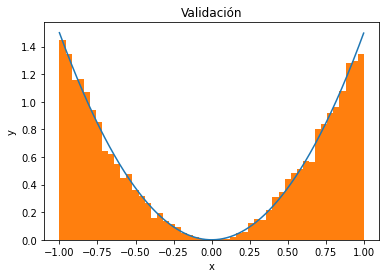

Se observa que el valor esperado o media es igual a 0


In [48]:
# Clase 9, trasformada inversa
np.random.seed(1)  # Para que siempre sean los mismos numeros aleatorios
N = 10000 # Número de muestras
a = -1  # intervalo de integración (Limite inferior)
b = 1  # intervalo de integración (Limite superior)
f = lambda x: (3/2)*x**2 if x<=1 and x>=-1 else 0  # Función Inicial
xi = lambda x: -(-2*x+1)**(1/3) if x<.5 else (2*x-1)**(1/3)  # Función usando transformada inversa
# Validación de la función
x = np.arange(a,b,0.001)  # Valores en x
plt.plot(x,list(map(f,x)))  # Grafica de la función Inicial
u = np.random.rand(N)  # Valores para la Función de la Transformada Inversa
randon_f = list(map(xi,u))  # Lista de valores de la función de la Transformada Inversa
plt.hist(randon_f, 50, density=True)  # Grafica de la Función de la Transformada Inversa
plt.title('Validación')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print('Se observa que el valor esperado o media es igual a 0')

In [59]:
# Generamos los 10 numeros aleatorios
N = 10
np.random.seed(1)
u1 = np.random.rand(N)

In [60]:
# a) Usando montecarlo crudo
mean_mon_crudo = np.mean(list(map(xi,u1)))
print('Estimacíon de la media =',mean_mon_crudo)
print('Se observa que el valor esperado o media es similar al teórico: 0')

Estimacíon de la media = -0.5043806672123164
Se observa que el valor esperado o media es similar al teórico: 0


In [61]:
# b) Usando muestreo estratificado 1
r1 = u1[0:3]
r2 = u1[3:6]
r3 = u1[6:]
r = [r1,r2,r3]
m = range(len(r))  # Cantidad de estratos
w = [((len(r1)/N)/(0.6-0)), ((len(r2)/N)/(0.9-0.6)), ((len(r3)/N)/(1-0.9))]
estrat1 = list(map(lambda r:np.array(list(map(xi,r))),r))
muestras = list(map(lambda wi,xi:xi/wi,w,estrat1))
print('Estimacíon de la media =', np.concatenate(muestras).mean())
print('Se observa que el valor esperado o media es similar al teórico: 0')

Estimacíon de la media = -0.4559904610081392
Se observa que el valor esperado o media es similar al teórico: 0


In [62]:
# c) Aleatorios Complementarios
u_comp = 1-u1
mean_aux = np.mean(list(map(xi,u_comp)))
mean_nume_compleme = (mean_mon_crudo+mean_aux)/2
print('Estimacíon de la media =',mean_nume_compleme)
print('Se observa que el valor esperado o media es igual al teórico: 0')

Estimacíon de la media = 0.0


In [66]:
# d) Método muestreo estratificado (B estratos)
B = [2,4,6,10]  # Cantidad de estratos
muestras = list(map(est,B))  # Muestras para cada estrato 
aleatorios_f = list(map(lambda m_i:list(map(lambda m:xi(m),m_i)),muestras))  # Evalúo las muestras creadas (son 2 "map" por que 'muestras' es una lista de listas)
prom_estratos = list(map(lambda ei:np.mean(ei),aleatorios_f))  # Calculo la media para cada estrato
res = list(map(lambda b, prom:print('Estimacíon de la media para %i estratos es %2.4f' %(b, prom)), B, prom_estratos))

Estimacíon de la media para 2 estratos es 0.1431
Estimacíon de la media para 4 estratos es 0.0810
Estimacíon de la media para 6 estratos es 0.0155
Estimacíon de la media para 10 estratos es 0.0062
